In [1]:
# Topic Modelling
# - Takes a collection of documents (e.g. strings, rows in a database)
# - Groups them into a smaller number of topics based on patterns 
# - Is an example of unsupervised learning.

# Latent Dirichlet Allocation (LDA)
# - Assumes thst the topics withing the document are 'latent' or hidden. Text in the document needs to be exaimed to 'find' them. 
# - A document might contain words about multiple topics, but we assume that the document is about one topics 

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
from gensim import corpora

In [3]:
data = pd.read_csv('news_articles.csv')

In [4]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [6]:
data.info() # Check for number of row and any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
articles = data['content']

In [10]:
# Clean the text data
# lower cases + remove punctuation
articles = articles.str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove stopwords
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))

# Tokenize the text data
articles = articles.apply(lambda x: word_tokenize(x))

# Stem the text data
ps = PorterStemmer()
articles = articles.apply(lambda x: [ps.stem(word) for word in x])

In [15]:
articles[::5]

0     [dr, frank, sack, professor, nutrit, harvard, ...
5     [indianapoli, senat, ted, cruz, texa, desper, ...
10    [want, get, brief, email, here, good, even, he...
15    [good, morn, want, get, california, today, ema...
20    [washington, presid, trump, plan, take, execut...
25    [student, citi, colleg, new, york, flagship, l...
30    [washington, north, korea, threaten, new, year...
35    [jerusalem, isra, turkish, leader, announc, fo...
40    [hong, kong, digit, currenc, bitcoin, plung, w...
45    [year, polit, convent, pull, amaz, feat, reboo...
50    [washington, presid, trump, upend, america, tr...
55    [nice, franc, live, 12th, floor, high, rise, h...
60    [urbana, ill, decad, ago, agricultur, scientis...
65    [dhaka, bangladesh, bangladesh, govern, move, ...
70    [coverag, leak, 2005, audio, tape, donald, tru...
75    [lo, angel, john, mayer, explain, he, fact, ge...
80    [braulio, jatar, biggest, scoop, year, venezue...
85    [washington, moment, republican, plan, rep

In [16]:
dictionary = corpora.Dictionary(articles) # Each word is assigned a unique integer id with will allow the LDA model to use the words. 
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [22]:
doc_term = [dictionary.doc2bow(article) for article in articles] # Using list comprehension to convert and article into a bag of words vector, which is needed by the LDA model. 

doc_term

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 3),
  (22, 1),
  (23, 3),
  (24, 2),
  (25, 4),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 6),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 4),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 5),
  (71, 4),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 4),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 3),
  (90, 1),
  (91, 2)

In [23]:
num_topics = 2

In [27]:
lda_model = gensim.models.LdaModel(
    corpus=doc_term, 
    id2word=dictionary, 
    num_topics=num_topics)

In [29]:
lda_model.print_topics(num_words=5, num_topics=num_topics)

[(0,
  '0.017*"said" + 0.017*"mr" + 0.006*"trump" + 0.005*"would" + 0.005*"one"'),
 (1,
  '0.017*"mr" + 0.012*"said" + 0.006*"state" + 0.005*"trump" + 0.004*"would"')]

In [30]:
# Resulting topics aren't very interpretable, so we need to improve the model. 

In [ ]:
# Latent Semantic Analysis (LSA)
# - Distrbutional hypothsis : Words with similar meanings will be found in similar contexts. 
# - Singular Value Decomposition (SVD) : Is a method of dimensionality reduction. It receates text document into different vectors. 
# - Can be used to reduce the dimensionality of the data, and to find the most important topics. 

In [32]:
from gensim.models import LsiModel

In [33]:
lsamodel = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)

In [34]:
print(lsamodel.print_topics(num_words=5, num_topics=num_topics))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


In [36]:
# Coherence score : Is a measure of how meaningful the top words are in the topics. 
# - Higher the score, the more meaningful the topics. 
# - Lower the score, the more random the topics. 




In [37]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [38]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(
        corpus=doc_term,
        num_topics=num_topics_i,
        id2word=dictionary,
        random_seed=0)
    model_list.append(model)
    coherencemodel = CoherenceModel(
        model=model,
        texts=articles,
        dictionary=dictionary,
        coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())




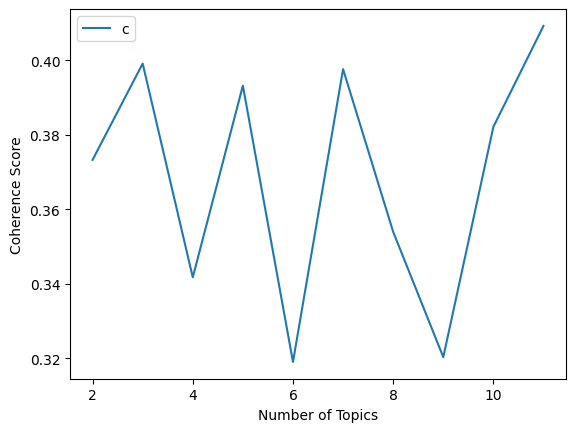

In [39]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [43]:
final_num_topics = 3

final_lsamodel = LsiModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=final_num_topics)

print(final_lsamodel.print_topics(num_words=5, num_topics=final_num_topics))


[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'), (2, '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr"')]
